<a href="https://colab.research.google.com/github/xavionbiesterveld/Heads-Down---CS-355/blob/main/SearchAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import random
import string

random.seed(42) # set the random seed to be your 7 digit Campus ID (Your Blugold ID)

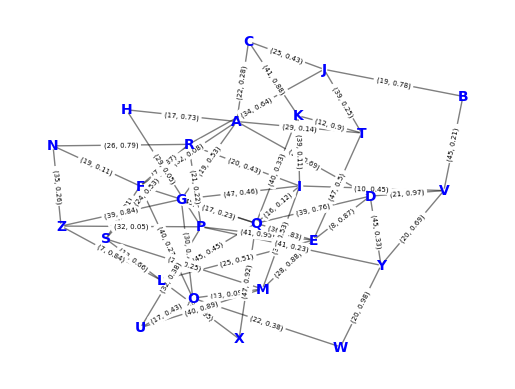

In [ ]:
def generate_graph(num_nodes, edge_prob):
    graph = nx.Graph()
    # Generate labels A, B, C...
    nodes = [string.ascii_uppercase[i] for i in range(num_nodes)]
    graph.add_nodes_from(nodes)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if random.random() < edge_prob:
                distance = random.randint(5, 50)
                prob = round(random.uniform(0.05, 1), 2)
                graph.add_edge(nodes[i], nodes[j], label=(distance, prob)) # Store edge label as a tuple
    return graph


# Generate the graph with 26 nodes and edge probability of 0.15
graph = generate_graph(26, 0.15)


#Plot the graph
pos = nx.kamada_kawai_layout(graph) # positions for all nodes

# nodes
nx.draw_networkx_nodes(graph, pos, node_size=10, node_color="white")

# edges
nx.draw_networkx_edges(graph, pos, alpha=0.5)

# labels
nx.draw_networkx_labels(graph, pos, font_size=10,font_color="blue",font_weight="bold")

# Add edge labels
edge_labels = nx.get_edge_attributes(graph, 'label')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=5)

plt.axis("off")
plt.show()


In [30]:
# prompt: Implement Uniform-Cost Search (Dijkstra's Algorithm) to find the shortest path between two nodes in the graph, minimizing the total sum of distances. Use a priority queue (heapq) to efficiently manage path costs. Return the shortest path from 'A' to 'Z' and its total distance

def uniform_cost_search(graph, start, goal):
    """
    Performs Uniform-Cost Search (Dijkstra's algorithm) to find the shortest path.

    Args:
        graph: The input graph (networkx graph).
        start: The starting node.
        goal: The goal node.

    Returns:
        A tuple containing:
            - The shortest path from start to goal.
            - The total distance of the shortest path.
        Returns (None, inf) if no path is found.
    """
    priority_queue = [(0, start, [start])]  # (cost, current_node, path)
    visited = set()
    while priority_queue:
        cost, current_node, path = heapq.heappop(priority_queue)
        if current_node == goal:
            return path, cost
        if current_node in visited:
            continue
        visited.add(current_node)
        for neighbor in graph.neighbors(current_node):
            edge_data = graph.get_edge_data(current_node, neighbor)
            if edge_data:
                distance = edge_data['label'][0]
                new_cost = cost + distance
                heapq.heappush(priority_queue, (new_cost, neighbor, path + [neighbor]))
    return None, float('inf')  # No path found


# Find the shortest path from 'A' to 'Z'
shortest_path, total_distance = uniform_cost_search(graph, 'A', 'Z')

if shortest_path:
    print("Shortest path from A to Z:", shortest_path)
    print("Total distance:", total_distance)
else:
    print("No path found from A to Z.")


Shortest path from A to Z: ['A', 'I', 'L', 'Z']
Total distance: 79
